# Playing with Pandas and Numpy


---

*Key questions:*

  - "How can I import data in Python ?"
  - "What is Pandas ?"
  - "Why should I use Pandas to work with data ?"

In [2]:
import urllib.request
# You can also get this URL value by right-clicking the `survey.csv` link above and selecting "Copy Link Address"
url = 'https://github.com/aaneloy/DATA2010-Fall2021-Lab/blob/main/Dataset/survey.csv'
urllib.request.urlretrieve(url, 'surveys.csv')

('surveys.csv', <http.client.HTTPMessage at 0x13fac08dac8>)

In [ ]:
!pip install pandas matplotlib

In [3]:
import pandas as pd
import numpy as np

In [6]:
surveys_df = pd.read_csv("survey.csv")

Notice when you assign the imported DataFrame to a variable, Python does not
produce any output on the screen. We can view the value of the `surveys_df`
object by typing its name into the cell.

In [7]:
surveys_df

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


You can also select just a few rows, so it is easier to fit on one window, you can see that pandas has neatly formatted the data to fit our screen.

Here, we will be using a function called **head**.

The `head()` function displays the first several lines of a file. It is discussed below.


In [7]:
surveys_df.head(10)

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


## Exploring Our Species Survey Data

Again, we can use the `type` function to see what kind of thing `surveys_df` is:



In [8]:
type(surveys_df)

pandas.core.frame.DataFrame


As expected, it's a DataFrame (or, to use the full name that Python uses to refer
to it internally, a `pandas.core.frame.DataFrame`).

What kind of things does `surveys_df` contain? DataFrames have an attribute
called `dtypes` that answers this:



In [9]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
site_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

## Challenge - DataFrames

Using our DataFrame `surveys_df`, try out the attributes & methods below to see
what they return.

1. `surveys_df.columns`
2. `surveys_df.shape` Take note of the output of `shape` - what format does it
   return the shape of the DataFrame in?   HINT: [More on tuples, here](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences).
3. `surveys_df.head()` Also, what does `surveys_df.head(15)` do?
4. `surveys_df.tail()`




## Solution - DataFrames

... try it yourself !

# Calculating Statistics From Data

We've read our data into Python. Next, let's perform some quick summary
statistics to learn more about the data that we're working with. We might want
to know how many animals were collected in each plot, or how many of each
species were caught. We can perform summary stats quickly using groups. But
first we need to figure out what we want to group by.

Let's begin by exploring our data:



In [10]:
# Look at the column names
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'site_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [11]:
surveys_df['species_id']

0         NL
1         NL
2         DM
3         DM
4         DM
        ... 
35544     AH
35545     AH
35546     RM
35547     DO
35548    NaN
Name: species_id, Length: 35549, dtype: object

Let's get a list of all the species. The `pd.unique` function tells us all of
the unique values in the `species_id` column.

In [12]:
pd.unique(surveys_df['species_id'])

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [16]:
len((surveys_df['site_id']))

35549

In [18]:
surveys_df['site_id'].unique()

array([ 2,  3,  7,  1,  6,  5,  8,  4, 11, 14, 15, 13,  9, 10, 17, 16, 20,
       23, 18, 21, 22, 19, 12, 24], dtype=int64)

# Interpreting missing data

1. Check if there is any missing data
2. Replace the missing data by `zero`
3. Copy the dataframe so that we can use later.

In [19]:
# Check for missing values

surveys_df.isna().sum()   # or s.isnull().sum() for older pandas versions

record_id             0
month                 0
day                   0
year                  0
site_id               0
species_id          763
sex                2511
hindfoot_length    4111
weight             3266
dtype: int64

In [20]:
surveys_df.isna()

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...
35544,False,False,False,False,False,False,True,True,True
35545,False,False,False,False,False,False,True,True,True
35546,False,False,False,False,False,False,False,False,False
35547,False,False,False,False,False,False,False,False,False


In [21]:
#Copy the dataframe and replace the Null values by zero

surveys_df_2 = surveys_df.copy()

In [22]:
surveys_df_2['weight'].fillna(0, inplace=True)
surveys_df_2['hindfoot_length'].fillna(0, inplace=True)
surveys_df_2

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,0.0
1,2,7,16,1977,3,NL,M,33.0,0.0
2,3,7,16,1977,2,DM,F,37.0,0.0
3,4,7,16,1977,7,DM,M,36.0,0.0
4,5,7,16,1977,3,DM,M,35.0,0.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,0.0,0.0
35545,35546,12,31,2002,15,AH,NaN,0.0,0.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [23]:
surveys_df_2.isna().sum()

record_id             0
month                 0
day                   0
year                  0
site_id               0
species_id          763
sex                2511
hindfoot_length       0
weight                0
dtype: int64

In [25]:
surveys_df_2.dropna()

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,0.0
1,2,7,16,1977,3,NL,M,33.0,0.0
2,3,7,16,1977,2,DM,F,37.0,0.0
3,4,7,16,1977,7,DM,M,36.0,0.0
4,5,7,16,1977,3,DM,M,35.0,0.0
...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [26]:
surveys_df_2

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,0.0
1,2,7,16,1977,3,NL,M,33.0,0.0
2,3,7,16,1977,2,DM,F,37.0,0.0
3,4,7,16,1977,7,DM,M,36.0,0.0
4,5,7,16,1977,3,DM,M,35.0,0.0
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,0.0,0.0
35545,35546,12,31,2002,15,AH,NaN,0.0,0.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [24]:
# We can also simply drop the 'NaN' or 'NULL' value rows
surveys_df_3 = surveys_df.dropna()
surveys_df_3

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight
62,63,8,19,1977,3,DM,M,35.0,40.0
63,64,8,19,1977,7,DM,M,37.0,48.0
64,65,8,19,1977,4,DM,F,34.0,29.0
65,66,8,19,1977,4,DM,F,35.0,46.0
66,67,8,19,1977,7,DM,M,35.0,36.0
...,...,...,...,...,...,...,...,...,...
35540,35541,12,31,2002,15,PB,F,24.0,31.0
35541,35542,12,31,2002,15,PB,F,26.0,29.0
35542,35543,12,31,2002,15,PB,F,27.0,34.0
35546,35547,12,31,2002,10,RM,F,15.0,14.0


In [27]:
#Check if any null values


surveys_df_3.isna().sum()

record_id          0
month              0
day                0
year               0
site_id            0
species_id         0
sex                0
hindfoot_length    0
weight             0
dtype: int64

## Challenge - Statistics

1. Create a list of unique site ID's found in the surveys data. Call it
  `site_names`. How many unique sites are there in the data? How many unique
  species are in the data?

2. What is the difference between `len(site_names)` and `surveys_df['site_id'].nunique()`?

## Solution - Statistics

In [5]:
site_names = pd.unique(surveys_df['site_id'])
print(len(site_names), surveys_df['site_id'].nunique())

NameError: name 'surveys_df' is not defined

# Groups in Pandas

We often want to calculate summary statistics grouped by subsets or attributes
within fields of our data. For example, we might want to calculate the average
weight of all individuals per site.

We can calculate basic statistics for all records in a single column using the
syntax below:

In [29]:
surveys_df['weight'].describe()

count    32283.000000
mean        42.672428
std         36.631259
min          4.000000
25%         20.000000
50%         37.000000
75%         48.000000
max        280.000000
Name: weight, dtype: float64


We can also extract one specific metric if we wish:



In [8]:
surveys_df['weight'].min()
surveys_df['weight'].max()
surveys_df['weight'].mean()
surveys_df['weight'].std()
# only the last command shows output below - you can try the others above in new cells
surveys_df['weight'].count()

32283


But if we want to summarize by one or more variables, for example sex, we can
use **Pandas' `.groupby` method**. Once we've created a groupby DataFrame, we
can quickly calculate summary statistics by a group of our choice.



In [9]:
# Group data by sex
grouped_data = surveys_df.groupby('sex')

In [10]:
grouped_data


The **pandas function `describe`** will return descriptive stats including: mean,
median, max, min, std and count for a particular column in the data. **Note** Pandas'
`describe` function will only return summary values for columns containing
numeric data.



In [11]:
# Summary statistics for all numeric columns by sex
grouped_data.describe()

# Provide the mean for each numeric column by sex
# As above, only the last command shows output below - you can try the others above in new cells
grouped_data.mean()

,record_id,month,day,year,site_id,hindfoot_length,weight
sex,,,,,,,
F,18036.412046,6.583047,16.007138,1990.644997,11.440854,28.836780,42.170555
M,17754.835601,6.392668,16.184286,1990.480401,11.098282,29.709578,42.995379



The `groupby` command is powerful in that it allows us to quickly generate
summary stats.



## Challenge - Summary Data

1. How many recorded individuals are female `F` and how many male `M`
    - A) 17348 and 15690
    - B) 14894 and 16476
    - C) 15303 and 16879
    - D) 15690 and 17348


2. What happens when you group by two columns using the following syntax and
    then grab mean values:
	- `grouped_data2 = surveys_df.groupby(['site_id','sex'])`
	- `grouped_data2.mean()`


3. Summarize weight values for each site in your data. HINT: you can use the
  following syntax to only create summary statistics for one column in your data
  `by_site['weight'].describe()`



## Solution- Summary Data

In [34]:
## Solution Challenge 1
grouped_data.count()

,record_id,month,day,year,site_id,species_id,hindfoot_length,weight
sex,,,,,,,,
F,15690,15690,15690,15690,15690,15690,14894,15303
M,17348,17348,17348,17348,17348,17348,16476,16879


### Solution - Challenge 2

The mean value for each combination of site and sex is calculated. Remark that the 
mean does not make sense for each variable, so you can specify this column-wise: 
e.g. I want to know the last survey year, median foot-length and mean weight for each site/sex combination:

In [12]:
# Solution- Challenge 3
surveys_df.groupby(['site_id'])['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
site_id,,,,,,,,
1,1903.0,51.822911,38.176670,4.0,30.0,44.0,53.0,231.0
2,2074.0,52.251688,46.503602,5.0,24.0,41.0,50.0,278.0
3,1710.0,32.654386,35.641630,4.0,14.0,23.0,36.0,250.0
4,1866.0,47.928189,32.886598,4.0,30.0,43.0,50.0,200.0
5,1092.0,40.947802,34.086616,5.0,21.0,37.0,48.0,248.0
6,1463.0,36.738893,30.648310,5.0,18.0,30.0,45.0,243.0
7,638.0,20.663009,21.315325,4.0,11.0,17.0,23.0,235.0
8,1781.0,47.758001,33.192194,5.0,26.0,44.0,51.0,178.0
9,1811.0,51.432358,33.724726,6.0,36.0,45.0,50.0,275.0


## Did you get #3 right?
 **A Snippet of the Output from part 3 of the challenge looks like:**

```
	site_id
	1     count    1903.000000
	      mean       51.822911
	      std        38.176670
	      min         4.000000
	      25%        30.000000
	      50%        44.000000
	      75%        53.000000
	      max       231.000000
         ...
```



## Quickly Creating Summary Counts in Pandas

Let's next count the number of samples for each species. We can do this in a few
ways, but we'll use `groupby` combined with **a `count()` method**.




In [13]:
# Count the number of samples by species
species_counts = surveys_df.groupby('species_id')['record_id'].count()
print(species_counts)

species_id
AB      303
AH      437
AS        2
BA       46
CB       50
CM       13
CQ       16
CS        1
CT        1
CU        1
CV        1
DM    10596
DO     3027
DS     2504
DX       40
NL     1252
OL     1006
OT     2249
OX       12
PB     2891
PC       39
PE     1299
PF     1597
PG        8
PH       32
PI        9
PL       36
PM      899
PP     3123
PU        5
PX        6
RF       75
RM     2609
RO        8
RX        2
SA       75
SC        1
SF       43
SH      147
SO       43
SS      248
ST        1
SU        5
UL        4
UP        8
UR       10
US        4
ZL        2
Name: record_id, dtype: int64



Or, we can also count just the rows that have the species "DO":



In [37]:
surveys_df.groupby('species_id')['record_id'].count()['DO']

3027

## Basic Math Functions

If we wanted to, we could perform math on an entire column of our data. For
example let's multiply all weight values by 2. A more practical use of this might
be to normalize the data according to a mean, area, or some other value
calculated from our data.



In [16]:
# Multiply all weight values by 2 but does not change the original weight data, rather than create new column with "weighted value" variable
surveys_df['weighted_in_Kg'] = surveys_df['weight']*2

In [17]:
surveys_df

,record_id,month,day,year,site_id,species_id,sex,hindfoot_length,weight,weighted_in_Kg
0,1,7,16,1977,2,NL,M,32.0,NaN,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0,28.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0,102.0


## Quick & Easy Plotting Data Using Pandas

We can plot our summary stats using Pandas, too.



<AxesSubplot:xlabel='species_id'>

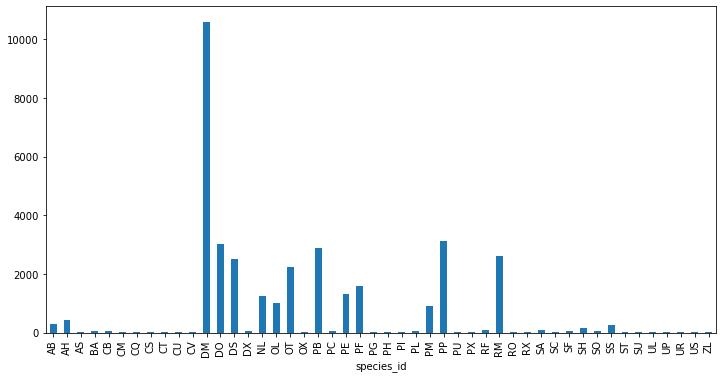

In [19]:
import matplotlib.pyplot as plt

## To make sure figures appear inside Jupyter Notebook
%matplotlib inline

# Create a quick bar chart
plt.figure(figsize=(12,6))
species_counts.plot(kind='bar')

#### Animals per site plot

We can also look at how many animals were captured in each site.

<AxesSubplot:xlabel='site_id'>

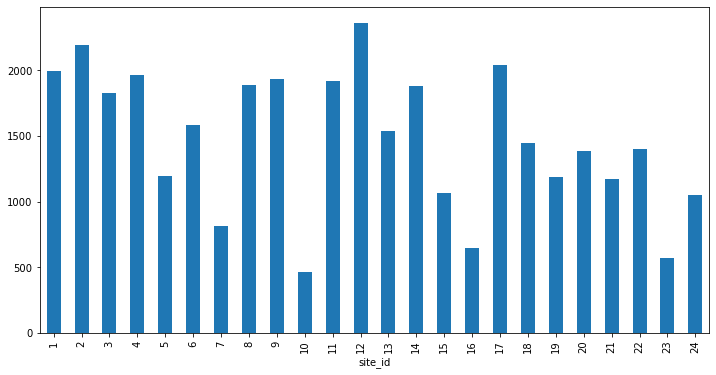

In [21]:
total_count = surveys_df.groupby('site_id')['record_id'].nunique()
# Let's plot that too
plt.figure(figsize=(12,6))
total_count.plot(kind='bar')

## _Extra Plotting Challenge_

1. Create a plot of average weight across all species per plot.

2. Create a plot of total males versus total females for the entire dataset.
 
3. Create a stacked bar plot, with weight on the Y axis, and the stacked variable being sex. The plot should show total weight by sex for each plot. Some tips are below to help you solve this challenge:
[For more on Pandas plots, visit this link.](http://pandas.pydata.org/pandas-docs/stable/visualization.html#basic-plotting-plot)





<AxesSubplot:xlabel='site_id'>

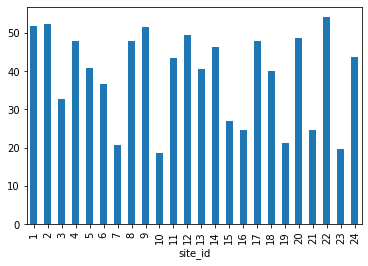

In [23]:
surveys_df.groupby('site_id').mean()["weight"].plot(kind='bar')

### _Solution to Extra Plotting Challenge 1_

![The output should look like this](Plot1.png "The output should look like this")

### _Solution to Extra Plotting Challenge 2_

# Solution Plotting Challenge 2
## Create plot of total males versus total females for the entire dataset.

The output should look like this <img src="https://github.com/aaneloy/DATA2010-Fall2021-Lab/blob/main/plot2.png" width=400 height=400 />

<AxesSubplot:xlabel='sex'>

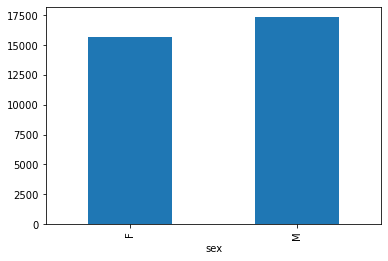

In [24]:
surveys_df.groupby('sex').count()["record_id"].plot(kind='bar')

### _Solution to Extra Plotting Challenge 3_

First we group data by site and by sex, and then calculate a total for each site.

![The output should look like this](Plot3.png "The output should look like this")


This calculates the sums of weights for each sex within each plot as a table

```
site  sex
site_id  sex
1        F      38253
         M      59979
2        F      50144
         M      57250
3        F      27251
         M      28253
4        F      39796
         M      49377
<other sites removed for brevity>
```

Below we'll use `.unstack()` on our grouped data to figure out the total weight that each sex contributed to each plot.



Now, create a stacked bar plot with that data where the weights for each sex are stacked by plot.

Rather than display it as a table, we can plot the above data by stacking the values of each sex as follows: